# Análise da Alucel
Esse material pertence ao curso **Data Science: Introdução a análise de séries temporais** da Alura.

## Preparando o ambiente

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

sns.set(rc={'figure.figsize':(18, 12)})

## Carregando dados

In [3]:
alucel = pd.read_csv('dados/alucel.csv')
alucel

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17
...,...,...
56,2018-11-26,10773.53
57,2018-11-27,22984.56
58,2018-11-28,9216.26
59,2018-11-29,12147.61


In [4]:
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [6]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

## Análise gráfica

In [7]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

crescimento_mensal = np.array([np.NaN])
for index in range(1, len(alucel.vendas)):
    mes_anterior = alucel.vendas[index - 1]
    crescimento = 0
    if(mes_anterior != 0):
        crescimento = round(((alucel.vendas[index] / alucel.vendas[index - 1]) - 1), 2)
    else:
        crescimento = np.NaN
    crescimento_mensal = np.append(crescimento_mensal, crescimento)
alucel['crescimento_mensal'] = crescimento_mensal
alucel

,dia,vendas,aumento,aceleracao,crescimento_mensal
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,0.59
2,2018-10-03,1860.36,-325.33,-1136.19,-0.15
3,2018-10-04,1939.02,78.66,403.99,0.04
4,2018-10-05,1946.17,7.15,-71.51,0.00
...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,-0.14
57,2018-11-27,22984.56,12211.03,13937.49,1.13
58,2018-11-28,9216.26,-13768.30,-25979.33,-0.60
59,2018-11-29,12147.61,2931.35,16699.65,0.32


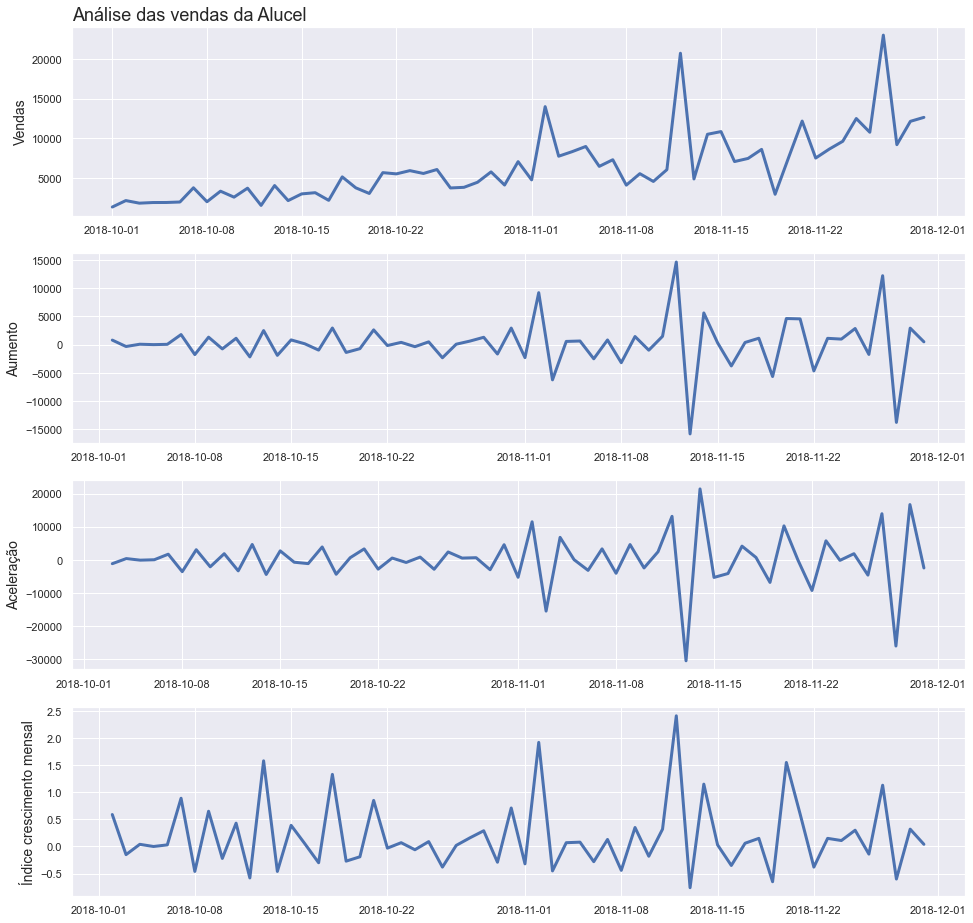

In [8]:
plt.figure(figsize=(16,16))

ax = plt.subplot(4,1,1)
ax.set_title('Análise das vendas da Alucel',fontsize=18, loc='left')
lp_vendas = sns.lineplot(x='dia', y='vendas', data=alucel, linewidth = 3)
lp_vendas.set_xlabel('')
lp_vendas.set_ylabel('Vendas', fontsize=14);

plt.subplot(4,1,2)
lp_aumento = sns.lineplot(x='dia', y='aumento', data=alucel, linewidth = 3)
lp_aumento.set_xlabel('')
lp_aumento.set_ylabel('Aumento', fontsize=14);

plt.subplot(4,1,3)
lp_aceleracao = sns.lineplot(x='dia', y='aceleracao', data=alucel, linewidth = 3)
lp_aceleracao.set_xlabel('')
lp_aceleracao.set_ylabel('Aceleração', fontsize=14);

plt.subplot(4,1,4)
lp_crescimento_mensal = sns.lineplot(x='dia', y='crescimento_mensal', data=alucel, linewidth = 3)
lp_crescimento_mensal.set_xlabel('')
lp_crescimento_mensal.set_ylabel('Índice crescimento mensal', fontsize=14);

## Média móvel

Cálculo da média móvel a partir do sétimo dia (`rolling(7)`).

In [9]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel

,dia,vendas,aumento,aceleracao,crescimento_mensal,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,0.59,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,-0.15,NaN
3,2018-10-04,1939.02,78.66,403.99,0.04,NaN
4,2018-10-05,1946.17,7.15,-71.51,0.00,NaN
...,...,...,...,...,...,...
56,2018-11-26,10773.53,-1726.46,-4587.84,-0.14,9840.835714
57,2018-11-27,22984.56,12211.03,13937.49,1.13,12037.211429
58,2018-11-28,9216.26,-13768.30,-25979.33,-0.60,11613.995714
59,2018-11-29,12147.61,2931.35,16699.65,0.32,12273.428571


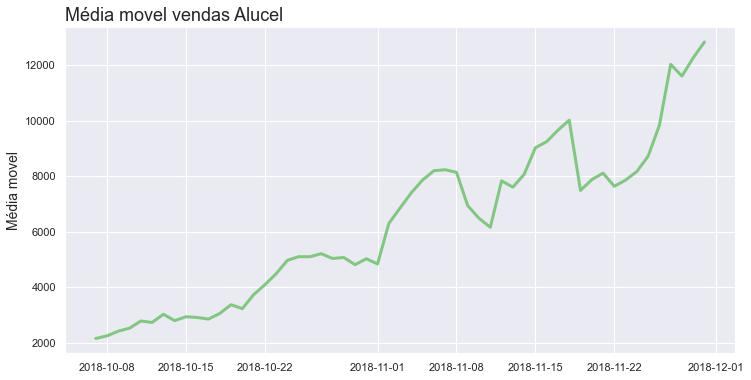

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax: ax = sns.lineplot(x='dia', y='media_movel', data=alucel, linewidth = 3)
ax.figure.set_size_inches(12,6)
ax.set_title('Média movel vendas Alucel 7 dias', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Média movel', fontsize=14);

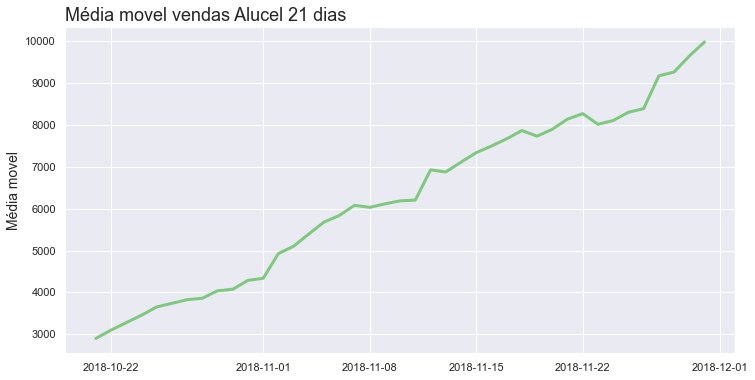

In [14]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax: ax = sns.lineplot(x='dia', y='media_movel_21', data=alucel, linewidth = 3)
ax.figure.set_size_inches(12,6)
ax.set_title('Média movel vendas Alucel 21 dias', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Média movel', fontsize=14);